In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
i = Input(shape=(28, 28))
x = LSTM(128)(i)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.9253 - loss: 0.2505 - val_accuracy: 0.9681 - val_loss: 0.1056
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 49ms/step - accuracy: 0.9680 - loss: 0.1125 - val_accuracy: 0.9745 - val_loss: 0.0806
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 124s 39ms/step - accuracy: 0.9773 - loss: 0.0804 - val_accuracy: 0.9783 - val_loss: 0.0762
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9802 - loss: 0.0688 - val_accuracy: 0.9829 - val_loss: 0.0593
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 38ms/step - accuracy: 0.9860 - loss: 0.0501 - val_accuracy: 0.9854 - val_loss: 0.0501
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.9869 - loss: 0.0473 - val_accuracy: 0.9881 - val_loss: 0.0410
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9886 - loss: 0.0394 - val_accuracy: 0.9884 - val_loss: 0.0409
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.9901 

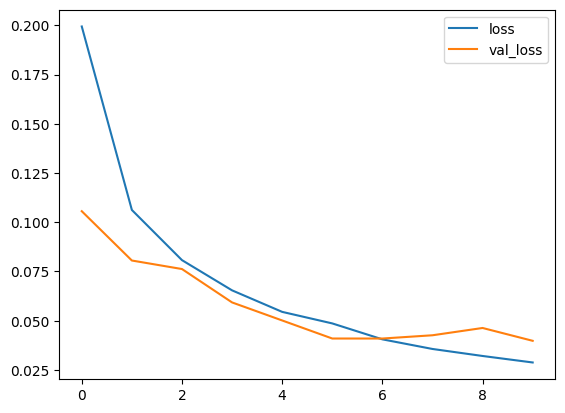

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

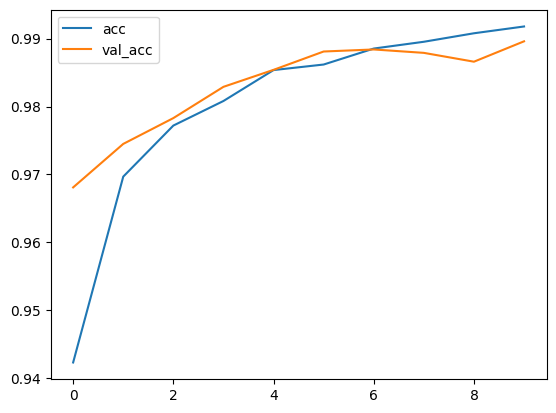

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


Text(0.5, 1.0, 'Predicted: 7, Label: 1')

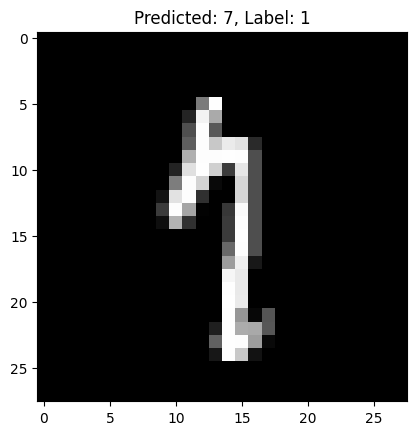

In [13]:
p_test = model.predict(x_test).argmax(axis=1)
a = np.where(p_test!=y_test)[0]
b = np.random.choice(a)
plt.imshow(x_test[b], cmap='gray')
plt.title(f'Predicted: {p_test[b]}, Label: {y_test[b]}')

In [14]:
a

array([   8,  115,  247,  321,  445,  449,  495,  582,  716,  882,  900,
        938,  947, 1014, 1039, 1112, 1226, 1242, 1260, 1299, 1500, 1530,
       1549, 1681, 1748, 1901, 1938, 2016, 2035, 2040, 2109, 2130, 2148,
       2293, 2343, 2369, 2462, 2496, 2573, 2597, 2654, 2939, 2953, 3023,
       3062, 3073, 3117, 3225, 3289, 3373, 3457, 3534, 3767, 3780, 3818,
       3871, 3941, 4007, 4086, 4163, 4176, 4201, 4269, 4300, 4315, 4382,
       4497, 4507, 4639, 4723, 4731, 4761, 4880, 5457, 5841, 5936, 5937,
       5955, 5973, 5981, 5997, 6555, 6559, 6571, 6576, 6597, 6625, 6651,
       6783, 8277, 8325, 8408, 8522, 9009, 9024, 9280, 9505, 9620, 9664,
       9669, 9679, 9729, 9792, 9839])